# HW 5 - Page Rank
__`MIDS w261: Machine Learning at Scale | UC Berkeley School of Information | Summer 2021`__

In Weeks 8 and 9 you discussed key concepts related to graph based algorithms and implemented SSSP.   
In this final homework assignment you'll implement distributed PageRank using some data from Wikipedia.
By the end of this homework you should be able to:  
* ... __compare/contrast__ adjacency matrices and lists as representations of graphs for parallel computation.
* ... __explain__ the goal of the PageRank algorithm using the concept of an infinite Random Walk.
* ... __define__ a Markov chain including the conditions underwhich it will converge.
* ... __identify__ what modifications must be made to the web graph inorder to leverage Markov Chains.
* ... __implement__ distributed PageRank in Spark.

__Please refer to the `README` for homework submission instructions and additional resources.__

# Notebook Set-Up
Before starting your homework run the following cells to confirm your setup.

In [0]:
!sudo pip install networkx

Collecting networkx
 Downloading networkx-2.5.1-py3-none-any.whl (1.6 MB)
▏ | 10 kB 23.6 MB/s eta 0:00:01 |▍ | 20 kB 18.6 MB/s eta 0:00:01 |▋ | 30 kB 16.9 MB/s eta 0:00:01 |▉ | 40 kB 19.6 MB/s eta 0:00:01 |█ | 51 kB 22.4 MB/s eta 0:00:01 |█▏ | 61 kB 24.9 MB/s eta 0:00:01 |█▍ | 71 kB 27.4 MB/s eta 0:00:01 |█▋ | 81 kB 29.8 MB/s eta 0:00:01 |█▉ | 92 kB 16.3 MB/s eta 0:00:01 |██ | 102 kB 16.4 MB/s eta 0:00:01 |██▎ | 112 kB 16.4 MB/s eta 0:00:01 |██▍ | 122 kB 16.4 MB/s eta 0:00:01 |██▋ | 133 kB 16.4 MB/s eta 0:00:01 |██▉ | 143 kB 16.4 MB/s eta 0:00:01 |███ | 153 kB 16.4 MB/s eta 0:00:01 |███▎ | 163 kB 16.4 MB/s eta 0:00:01 |███▌ | 174 kB 16.4 MB/s eta 0:00:01 |███▋ | 184 kB 16.4 MB/s eta 0:00:01 |███▉ | 194 kB 16.4 MB/s eta 0:00:01 |████ | 204 kB 16.4 MB/s eta 0:00:01 |████▎ | 215 kB 16.4 MB/s eta 0:00:01 |████▌ | 225 kB 16.4 MB/s eta 0:00:01 |████▋ | 235 kB 16.4 MB/s eta 0:00:01 |████▉ | 245 kB 16.4 MB/s eta 0:00:01 |█████ | 256 kB 16.4 MB/s eta 0:00:01 |█████▎ | 266 kB 16.4 MB/s eta 0:00:01 |█████▌ | 276 kB 16.4 MB/s eta 0:00:01 |█████▊ | 286 kB 16.4 MB/s eta 0:00:01 |█████▉ | 296 kB 16.4 MB/s eta 0:00:01 |██████ | 307 kB 16.4 MB/s eta 0:00:01 |██████▎ | 317 kB 16.4 MB/s eta 0:00:01 |██████▌ | 327 kB 16.4 MB/s eta 0:00:01 |██████▊ | 337 kB 16.4 MB/s eta 0:00:01 |███████ | 348 kB 16.4 MB/s eta 0:00:01 |███████ | 358 kB 16.4 MB/s eta 0:00:01 |███████▎ | 368 kB 16.4 MB/s eta 0:00:01 |███████▌ | 378 kB 16.4 MB/s eta 0:00:01 |███████▊ | 389 kB 16.4 MB/s eta 0:00:01 |████████ | 399 kB 16.4 MB/s eta 0:00:01 |████████ | 409 kB 16.4 MB/s eta 0:00:01 |████████▎ | 419 kB 16.4 MB/s eta 0:00:01 |████████▌ | 430 kB 16.4 MB/s eta 0:00:01 |████████▊ | 440 kB 16.4 MB/s eta 0:00:01 |█████████ | 450 kB 16.4 MB/s eta 0:00:01 |█████████▏ | 460 kB 16.4 MB/s eta 0:00:01 |█████████▎ | 471 kB 16.4 MB/s eta 0:00:01 |█████████▌ | 481 kB 16.4 MB/s eta 0:00:01 |█████████▊ | 491 kB 16.4 MB/s eta 0:00:01 |██████████ | 501 kB 16.4 MB/s eta 0:00:01 |██████████▏ | 512 kB 16.4 MB/s eta 0:00:01 |██████████▍ | 522 kB 16.4 MB/s eta 0:00:01 |██████████▌ | 532 kB 16.4 MB/s eta 0:00:01 |██████████▊ | 542 kB 16.4 MB/s eta 0:00:01 |███████████ | 552 kB 16.4 MB/s eta 0:00:01 |███████████▏ | 563 kB 16.4 MB/s eta 0:00:01 |███████████▍ | 573 kB 16.4 MB/s eta 0:00:01 |███████████▋ | 583 kB 16.4 MB/s eta 0:00:01 |███████████▊ | 593 kB 16.4 MB/s eta 0:00:01 |████████████ | 604 kB 16.4 MB/s eta 0:00:01 |████████████▏ | 614 kB 16.4 MB/s eta 0:00:01 |████████████▍ | 624 kB 16.4 MB/s eta 0:00:01 |████████████▋ | 634 kB 16.4 MB/s eta 0:00:01 |████████████▊ | 645 kB 16.4 MB/s eta 0:00:01 |█████████████ | 655 kB 16.4 MB/s eta 0:00:01 |█████████████▏ | 665 kB 16.4 MB/s eta 0:00:01 |█████████████▍ | 675 kB 16.4 MB/s eta 0:00:01 |█████████████▋ | 686 kB 16.4 MB/s eta 0:00:01 |█████████████▉ | 696 kB 16.4 MB/s eta 0:00:01 |██████████████ | 706 kB 16.4 MB/s eta 0:00:01 |██████████████▏ | 716 kB 16.4 MB/s eta 0:00:01 |██████████████▍ | 727 kB 16.4 MB/s eta 0:00:01 |██████████████▋ | 737 kB 16.4 MB/s eta 0:00:01 |██████████████▉ | 747 kB 16.4 MB/s eta 0:00:01 |███████████████ | 757 kB 16.4 MB/s eta 0:00:01 |███████████████▏ | 768 kB 16.4 MB/s eta 0:00:01 |███████████████▍ | 778 kB 16.4 MB/s eta 0:00:01 |███████████████▋ | 788 kB 16.4 MB/s eta 0:00:01 |███████████████▉ | 798 kB 16.4 MB/s eta 0:00:01 |████████████████ | 808 kB 16.4 MB/s eta 0:00:01 |████████████████▏ | 819 kB 16.4 MB/s eta 0:00:01 |████████████████▍ | 829 kB 16.4 MB/s eta 0:00:01 |████████████████▋ | 839 kB 16.4 MB/s eta 0:00:01 |████████████████▉ | 849 kB 16.4 MB/s eta 0:00:01 |█████████████████ | 860 kB 16.4 MB/s eta 0:00:01 |█████████████████▎ | 870 kB 16.4 MB/s eta 0:00:01 |█████████████████▍ | 880 kB 16.4 MB/s eta 0:00:01 |█████████████████▋ | 890 kB 16.4 MB/s eta 0:00:01 |█████████████████▉ | 901 kB 16.4 MB/s eta 0:00:01 |██████████████████ | 911 kB 16.4 MB/s eta 0:00:01 |██████████████████▎ | 921 kB 16.4 MB/s eta 0:00:01 |████████

In [0]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

### Run the next cell to create your directory in dbfs
You do not need to understand this scala snippet. It simply dynamically fetches your user directory name so that any files you write can be saved in your own directory.

In [0]:
# RUN THIS CELL AS IS
# This code snippet reads the user directory name, and stores is in a python variable.
# Next, it creates a folder inside your home folder, which you will use for files which you save inside this notebook.
username = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('user')
userhome = 'dbfs:/user/' + username
print(userhome)
hw5_path = userhome + "/HW5/" 
hw5_path_open = '/dbfs' + hw5_path.split(':')[-1] # for use with python open()
dbutils.fs.mkdirs(hw5_path)

dbfs:/user/rsingh0206@berkeley.edu
Out[3]: True

In [0]:
# RUN THIS CELL AS IS. 
tot = 0
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
for item in dbutils.fs.ls(DATA_PATH):
  tot = tot+item.size
tot
# ~4.7GB

Out[4]: 4751198766

In [0]:
# RUN THIS CELL AS IS. You should see all-pages-indexed-in.txt, all-pages-indexed-out.txt and indices.txt in the results. If you do not see these, please let an Instructor or TA know.
display(dbutils.fs.ls(DATA_PATH))

path,name,size
dbfs:/mnt/mids-w261/HW5/all-pages-indexed-in.txt,all-pages-indexed-in.txt,2143300687
dbfs:/mnt/mids-w261/HW5/all-pages-indexed-out.txt,all-pages-indexed-out.txt,2090459616
dbfs:/mnt/mids-w261/HW5/indices.txt,indices.txt,517438296
dbfs:/mnt/mids-w261/HW5/test_graph.txt,test_graph.txt,167


In [0]:
# RUN THIS CELL AS IS - A test to make sure your directory is working as expected.
# You should see a result like:
# dbfs:/user/youremail@ischool.berkeley.edu/HW5/test.txt
dbutils.fs.put(hw5_path+'test.txt',"hello world",True)
display(dbutils.fs.ls(hw5_path))


Wrote 11 bytes.

path,name,size
dbfs:/user/rsingh0206@berkeley.edu/HW5/page_rank_top_20.txt,page_rank_top_20.txt,734
dbfs:/user/rsingh0206@berkeley.edu/HW5/test-result.txt,test-result.txt,25
dbfs:/user/rsingh0206@berkeley.edu/HW5/test.txt,test.txt,11


In [0]:
sc = spark.sparkContext
spark

Out[7]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.1 
 Master 
 spark://10.0.128.27:7077 
 AppName 
 Databricks Shell

# Question 1: Distributed Graph Processing
Chapter 5 from Lin & Dyer gave you a high level introduction to graph algorithms and concernts that come up when trying to perform distributed computations over them. The questions below are designed to make sure you captured the key points from this reading and your async lectures. 

### Q1 Tasks:

* __a) short response:__ Give an example of a dataset that would be appropriate to represent as a graph. What are the nodes/edges in this dataset? Is the graph you describe 'directed' or 'undirected'? What would the average "in-degree" of a node mean in the context of your example? 

* __b) short response:__ Other than their size/scale, what makes graphs uniquely challenging to work with in the map-reduce paradigm? *(__HINT__: Do not respond in terms of any specific algorithm. Think in terms of the nature of the graph datastructure itself).*

* __c) short response:__ Briefly describe Dijskra's algorithm (goal/approach). What specific design component makes this approach hard to parallelize?

* __d) short response:__ How does parallel breadth-first-search get around the problem that you identified in part `c`? At what expense?

### Q1 Student Answers:
> __a)__ Facebook dataset can be an example that would be appropriate to represent as a graph. Here, the person's profile is the node and friendship connections are the edges.This type of graph is undirected since friendhsip connection represnts that both profiles know each other. This can be different in instagram type of social network where a follower connection is directed. The average in degree of a node  will be average friendship connections to the profile

> __b)__ The data structure of a graph makes it difficult to work with the map-reduce paradigm as the map-reduce network is not iterative and traversing a matrix is sequential, which makes implementing the map-reduce paradigm on graphs difficult. 

> __c)__  Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a graph. Since the algorithm uses a data structure for storing and querying partial solutions sorted by distance from the start by using a min-priority queue, it is hard to parallelize as in Map-Reduce we cannot maintain the state of the min-priority queue.  

> __d)__ In order to parallelize using BFS we need to go through each potential solution to find the shortest path, which can be computationally expensive. For each node we need to do the following: in the Map phase we need to emit a key value pair for each neighbor in the adjacency list and in the Reduce phase we then select the shortest distance.

# Question 2: Representing Graphs 

In class you saw examples of adjacency matrix and adjacency list representations of graphs. These data structures were probably familiar from HW3, though we hadn't before talked about them in the context of graphs. In this question we'll discuss some of the tradeoffs associated with these representations. __`NOTE:`__ We'll use the graph from Figure 5.1 in Lin & Dyer as a toy example. For convenience in the code below we'll label the nodes `A`, `B`, `C`, `D`, and `E` instead of $n_1$, $n_2$, etc but otherwise you should be able to follow along & check our answers against those in the text.


<img src="https://github.com/kyleiwaniec/w261_assets/blob/master/images/HW5/Lin-Dyer-graph-Q1.png?raw=true" width=50%>

### Q2 Tasks:

* __a) short response:__ Relatively speaking, is the graph you described in Figure 5.1 in Lin & Dyer "sparse" or "dense"?  Explain how sparsity/density impacts the adjacency matrix and adjacency list representations of a graph.

* __b) short response:__ Run the provided code to create and plot our toy graph. Is this graph directed or undirected? Explain how the adjacency matrices for directed graphs will differ from those of undirected graphs.

* __c) code:__ Fill in the missing code to complete the function `get_adj_matr()`.

* __d) code:__ Fill in the missing code to complete the function `get_adj_list()`.

### Q2 Student Answers:
> __a)__ The graph is sparse as there are a lot of zeroes in the matrix, meaning that there are few edges/connections between the nodes. The denser the matrix the more edges you will have between the nodes in a graph (and the fewer zeroes there will be in the adjacency matrix / the more neighbors each node will have in the adjacency list).

> __b)__ Adjacency matrix for directed graphs: Since the graph is directed,there needs to be values on both sides of the diagonal line of the matrix, as the values in the edges between the nodes will depend on the direction of the relationship.Adjacency matrix for undirected graphs: Since the graph is undirected, there only needs to be values on one side of the diagonal line of the matrix, as there is no direction between the nodes and the values are bi-directional.

In [0]:
# part a - a graph is just a list of nodes and edges (RUN THIS CELL AS IS)
TOY_GRAPH = {'nodes':['A', 'B', 'C', 'D', 'E'],
             'edges':[('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'D'), 
                      ('D', 'E'), ('E', 'A'),('E', 'B'), ('E', 'C')]}

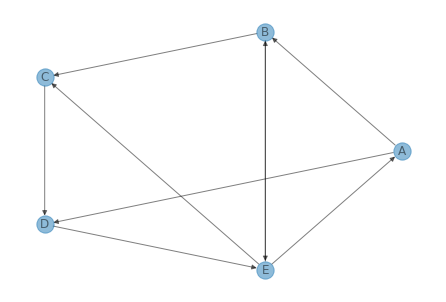

In [0]:
# part a - simple visualization of our toy graph using nx (RUN THIS CELL AS IS)
G = nx.DiGraph()
G.add_nodes_from(TOY_GRAPH['nodes'])
G.add_edges_from(TOY_GRAPH['edges'])
display(nx.draw(G, pos=nx.circular_layout(G), with_labels=True, alpha = 0.5))

In [0]:
# part c - adjacency matrix function
def get_adj_matr(graph):
    """
    Function to create an adjacency matrix representation of a graph.
    arg:
        graph - (dict) of 'nodes' : [], 'edges' : []
    returns:
        pd.DataFrame with entry i,j representing an edge from node i to node j
    """
    n = len(graph['nodes'])
    adj_matr = pd.DataFrame(0, columns = graph['nodes'], index = graph['nodes'])
    ############### YOUR CODE HERE ##################
    for e in graph['edges']:
      adj_matr.at[e[0],e[1]]=1
    ############### (END) YOUR CODE #################
    return adj_matr

In [0]:
# part c - take a look (RUN THIS CELL AS IS)
TOY_ADJ_MATR = get_adj_matr(TOY_GRAPH)
print(TOY_ADJ_MATR)

A B C D E
A 0 1 0 1 0
B 0 0 1 0 1
C 0 0 0 1 0
D 0 0 0 0 1
E 1 1 1 0 0

In [0]:
# part d - adjacency list function
def get_adj_list(graph):
    """
    Function to create an adjacency list representation of a graph.
    arg:
        graph - (dict) of 'nodes' : [], 'edges' : []
    returns:
        dictionary of the form {node : [list of edges]}
    """
    adj_list = {node: [] for node in graph['nodes']}
    ############### YOUR CODE HERE ##################
    for e in graph['edges']:
      adj_list[e[0]].append(e[1])
    ############### (END) YOUR CODE #################
    return adj_list

In [0]:
# part d - take a look (RUN THIS CELL AS IS)
TOY_ADJ_LIST = get_adj_list(TOY_GRAPH)
print(TOY_ADJ_LIST)

{'A': ['B', 'D'], 'B': ['C', 'E'], 'C': ['D'], 'D': ['E'], 'E': ['A', 'B', 'C']}

# Question 3: Markov Chains and Random Walks

As you know from your readings and in class discussions, the PageRank algorithm takes advantage of the machinery of Markov Chains to compute the relative importance of a webpage using the hyperlink structure of the web (we'll refer to this as the 'web-graph'). A Markov Chain is a discrete-time stochastic process. The stochastic matrix has a principal left eigen vector corresponding to its largest eigen value which is one. A Markov chain's probability distribution over its states may be viewed as a probability vector. This steady state probability for a state is the PageRank of the corresponding webpage. In this question we'll briefly discuss a few concepts that are key to understanding the math behind PageRank. 

### Q3 Tasks:

* __a) short response:__ It is common to explain PageRank using the analogy of a web surfer who clicks on links at random ad infinitum. In the context of this hypothetical infinite random walk, what does the PageRank metric measure/represent?

* __b) short response:__ What is the "Markov Property" and what does it mean in the context of PageRank?

* __c) short response:__ A Markov chain consists of $n$ states plus an $n\times n$ transition probability matrix. In the context of PageRank & a random walk over the WebGraph what are the $n$ states? what implications does this have about the size of the transition matrix?

* __d) code + short response:__ What is a "right stochastic matrix"? Fill in the code below to compute the transition matrix for the toy graph from question 2. [__`HINT:`__ _It should be right stochastic. Using numpy this calculation can be done in one line of code._]

* __e) code + short response:__ To compute the stable state distribution (i.e. PageRank) of a "nice" graph we can apply the power iteration method - repeatedly multiplying the transition matrix by itself, until the values no longer change. Apply this strategy to your transition matrix from `part d` to find the PageRank for each of the pages in your toy graph. Your code should print the results of each iteration. How many iterations does it take to converge? Which node is most 'central' (i.e. highest ranked)? Does this match your intuition? 
    * __`NOTE 1:`__ _this is a naive approach, we'll unpack what it means to be "nice" in the next question_.
    * __`NOTE 2:`__ _no need to implement a stopping criteria, visual inspection should suffice_.

### Q3 Student Answers:
> __a)__  In the context of hypothetical infinite random walk, the PageRank metric represents the likelihood that the web surfer will land on any specific node. As algorithm reaches its steady state, the most important node will be the one that is the most likely for the web surfer to land on. 

> __b)__ The Markov property states that the conditional probability distribution for the system at the next step (and in fact at all future steps) depends only on the current state of the system, and not additionally on the state of the system at previous steps. In the context of PageRank it means that the probability someone lands on a next node depend only on the current node its on, and not on any of the previous nodes it landed on.

> __c)__ The n states are the number of nodes in the graphs and the larger the number of states, the larger the nxn transition probability matrix becomes.

> __d)__ It is a matrix where the sum of all the rows add to 1.

> __e)__ After about 25 iterations we get a convergence to a steady state (however after 9-10 iterations we already get close to a steady state). The highest ranked node is E, which matches our intuition, as the in-links from E (B and D) have higher weights than the in-links the other nodes receive. As a result, we would expect E to be the highest ranked node.

In [0]:
# part d - recall what the adjacency matrix looked like (RUN THIS CELL AS IS)
TOY_ADJ_MATR
print(TOY_ADJ_MATR.sum(axis=1))

A 2
B 2
C 1
D 1
E 3
dtype: int64

In [0]:
# part d - use TOY_ADJ_MATR to create a right stochastic transition matrix for this graph
################ YOUR CODE HERE #################
#TOY_ADJ_MATR.sum(axis=1)
transition_matrix = TOY_ADJ_MATR.divide(TOY_ADJ_MATR.sum(axis=1),axis=0).fillna(0)
################ (END) YOUR CODE #################
print(transition_matrix)

A B C D E
A 0.000000 0.500000 0.000000 0.5 0.0
B 0.000000 0.000000 0.500000 0.0 0.5
C 0.000000 0.000000 0.000000 1.0 0.0
D 0.000000 0.000000 0.000000 0.0 1.0
E 0.333333 0.333333 0.333333 0.0 0.0

In [0]:
# part e - compute the steady state using the transition matrix 
def power_iteration(xInit, tMatrix, nIter, verbose = True):
    """
    Function to perform the specified number of power iteration steps to 
    compute the steady state probability distribution for the given
    transition matrix.
    
    Args:
        xInit     - (n x 1 array) representing inial state
        tMatrix  - (n x n array) transition probabilities
        nIter     - (int) number of iterations
    Returns:
        state_vector - (n x 1 array) representing probability 
                        distribution over states after nSteps.
    
    NOTE: if the 'verbose' flag is on, your function should print the step
    number and the current matrix at each iteration.
    """
    state_vector = xInit
    ################ YOUR CODE HERE #################
    for i in range(nIter):
      state_vector =  state_vector@tMatrix
      if verbose:
        print(f'Step {i+1}: {list(state_vector)}')
    ################ (END) YOUR CODE #################
    return state_vector

In [0]:
# part e - run 10 steps of the power_iteration (RUN THIS CELL AS IS)
xInit = np.array([1.0, 0, 0, 0, 0]) # note that this initial state will not affect the convergence states
states = power_iteration(xInit, transition_matrix, 50, verbose = True)

Step 1: [0.0, 0.5, 0.0, 0.5, 0.0]
Step 2: [0.0, 0.0, 0.25, 0.0, 0.75]
Step 3: [0.25, 0.25, 0.25, 0.25, 0.0]
Step 4: [0.0, 0.125, 0.125, 0.375, 0.375]
Step 5: [0.125, 0.125, 0.1875, 0.125, 0.4375]
Step 6: [0.14583333333333331, 0.20833333333333331, 0.20833333333333331, 0.25, 0.1875]
Step 7: [0.0625, 0.13541666666666666, 0.16666666666666666, 0.28125, 0.35416666666666663]
Step 8: [0.11805555555555554, 0.14930555555555552, 0.18576388888888887, 0.19791666666666666, 0.3489583333333333]
Step 9: [0.11631944444444443, 0.1753472222222222, 0.19097222222222218, 0.24479166666666663, 0.2725694444444444]
Step 10: [0.09085648148148147, 0.1490162037037037, 0.17853009259259256, 0.2491319444444444, 0.33246527777777773]
Step 11: [0.11082175925925924, 0.15624999999999997, 0.18532986111111108, 0.2239583333333333, 0.3236400462962962]
Step 12: [0.10788001543209874, 0.16329089506172836, 0.1860050154320987, 0.2407407407407407, 0.30208333333333326]
Step 13: [0.10069444444444442, 0.1546344521604938, 0.1823398919753086, 0.23994502314814808, 0.32238618827160487]
Step 14: [0.10746206275720162, 0.15780928497942381, 0.1847792888374485, 0.2326871141975308, 0.31726224922839497]
Step 15: [0.10575408307613166, 0.15948511445473246, 0.18465872556584356, 0.23851032021604932, 0.3115917566872427]
Step 16: [0.10386391889574756, 0.1567409604338134, 0.1836064761231138, 0.2375357671039094, 0.31825287744341557]
Step 17: [0.10608429248113851, 0.1580162519290123, 0.18445477269804522, 0.23553843557098758, 0.31590624732081607]
Step 18: [0.10530208244027202, 0.15834422868084128, 0.18431020840477816, 0.23749691893861447, 0.31454656153549376]
Step 19: [0.10484885384516458, 0.1574998950653006, 0.18402096818558522, 0.23696124962491416, 0.3166690332790351]
Step 20: [0.10555634442634504, 0.15798077134892732, 0.18430629195899534, 0.2364453951081675, 0.31571119715756446]
Step 21: [0.10523706571918814, 0.15801523793236066, 0.18422745139365182, 0.23708446417216786, 0.3154357807826312]
Step 22: [0.10514526026087706, 0.15776379312047112, 0.1841528792270574, 0.23684598425324588, 0.3160920831383482]
Step 23: [0.10536402771278272, 0.15793665784322125, 0.18424592427301828, 0.23672550935749592, 0.31572788081348147]
Step 24: [0.10524262693782716, 0.1579246407942185, 0.18421095585943778, 0.23692793812940965, 0.3156938382791066]
Step 25: [0.10523127942636885, 0.15785259289528242, 0.1841935998234781, 0.23683226932835136, 0.3158902585265189]
Step 26: [0.10529675284217296, 0.15791239255535738, 0.18422304928981417, 0.23680923953666252, 0.3157585657759926]
Step 27: [0.1052528552586642, 0.15790123167975068, 0.18420905153634287, 0.23687142571090064, 0.31576543581434124]
Step 28: [0.10525514527144708, 0.15788157290077917, 0.18420576111132242, 0.23683547916567496, 0.315822041550776]
Step 29: [0.10527401385025865, 0.15790158648598218, 0.18421480030064824, 0.23683333374704596, 0.31577626561606453]
Step 30: [0.10525875520535484, 0.15789576213048417, 0.18420954844834592, 0.23685180722577756, 0.31578412699003705]
Step 31: [0.10526137566334567, 0.1578907532660231, 0.18420925672858776, 0.23683892605102333, 0.3157996882910197]
Step 32: [0.10526656276367322, 0.15789725059534607, 0.18421193939668476, 0.23683994456026058, 0.3157843026840349]
Step 33: [0.10526143422801162, 0.15789471560984825, 0.18421005952568467, 0.23684522077852138, 0.31578856985793363]
Step 34: [0.1052628566193112, 0.15789357373331703, 0.18421021442423532, 0.2368407766396905, 0.3157925785834455]
Step 35: [0.10526419286114849, 0.1578956211708041, 0.184210979727807, 0.2368416427338909, 0.315787563506349]
Step 36: [0.105262521168783, 0.15789461759935725, 0.18421033175418505, 0.23684307615838124, 0.315789453319293]
Step 37: [0.10526315110643099, 0.1578944116908225, 0.1842104599061096, 0.23684159233857655, 0.3157903849580599]
Step 38: [0.10526346165268663, 0.15789503720590212, 0.18421066749809786, 0.23684203545932508, 0.3157887981839878]
Step 39: [0.10526293272799593, 0.15789466355433923, 0.184210451330947, 0.23684239832444118, 0.31578955406227616]
Step 

__`Expected Output for part e:`__  
>Steady State Probabilities:
```
Node A: 0.10526316  
Node B: 0.15789474  
Node C: 0.18421053  
Node D: 0.23684211  
Node E: 0.31578947  
```

# Question 4: Page Rank Theory

Seems easy right? Unfortunately applying this power iteration method directly to the web-graph actually runs into a few problems. In this question we'll tease apart what we meant by a 'nice graph' in Question 3 and highlight key modifications we'll have to make to the web-graph when performing PageRank. To start, we'll look at what goes wrong when we try to repeat our strategy from question 3 on a 'not nice' graph.

__`Additional References:`__ http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html

### Q4 Tasks:

* __a) code + short response:__ Run the provided code to create and plot our 'not nice' graph. Fill in the missing code to compute its transition matrix & run the power iteration method from question 3. What is wrong with what you see? [__`HINT:`__ _there is a visible underlying reason that it isn't converging... try adding up the probabilities in the state vector after each iteration._]

* __b) short response:__  Identify the dangling node in this 'not nice' graph and explain how this node causes the problem you described in 'a'. How could we modify the transition matrix after each iteration to prevent this problem?

* __c) short response:__ What does it mean for a graph to be irreducible? Is the webgraph naturally irreducible? Explain your reasoning briefly.

* __d) short response:__ What does it mean for a graph to be aperiodic? Is the webgraph naturally aperiodic? Explain your reasoning briefly.

* __e) short response:__ What modification to the webgraph does PageRank make in order to guarantee aperiodicity and irreducibility? Interpret this modification in terms of our random surfer analogy.

### Q4 Student Answers:
> __a)__ The matrix is not right stochastic (i.e., the sum of the rows is no longer equal to 1 after the second step). After each step, the sum of the rows is decreasing, which means that the PageRank will not achieve a steady state, but will get closer to 0 over time.

> __b)__ This is happening because node E doesn’t have any outgoing edge(dangling node). No matter what the probability of getting to node E is, once we land on E, we can’t go to any other nodes. As a result, over time, the probability of getting to any node in the graph becomes zero as we eventually will land on E. To fix this problem we could modify the transition matrix after each iteration by redistributing the probabilities of E equally across the other nodes, and as a result we would not get stuck in node E (with no way out).

> __c)__ A graph is irreducible if for every node in the graph there exists a path to any other node. A webgraph is not naturally irreducible as there is not a path between every website on the internet (i.e. some websites have no out-links).

> __d)__ A graph is aperiodic if the greatest common divisor of the lengths of its cycles is one. A webgraph is not naturally aperiodic as the GCD of the lengths of its cycles may not be one. 

> __e)__ To solve the irreducibility and aperiodicity problems , PageRank can make modification such as Teleportation: This is the ability to jump to any page from any page,that is, the ability to transition to any website from any current website.Our random surfer can type in any new url to switch out of current page.Pagerank can resolve dangling edges by redistributing the probability mass from dangling pages to all the other pages.

In [0]:
# part a - run this code to create a second toy graph (RUN THIS CELL AS IS)
TOY2_GRAPH = {'nodes':['A', 'B', 'C', 'D', 'E'],
              'edges':[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D'), 
                       ('B', 'E'), ('C', 'A'), ('C', 'E'), ('D', 'B')]}

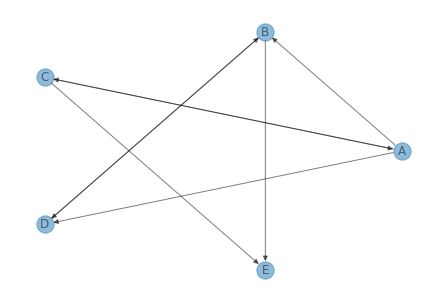

In [0]:
# part a - simple visualization of our test graph using nx (RUN THIS CELL AS IS)
G = nx.DiGraph()
G.add_nodes_from(TOY2_GRAPH['nodes'])
G.add_edges_from(TOY2_GRAPH['edges'])
display(nx.draw(G, pos=nx.circular_layout(G), with_labels=True, alpha = 0.5))

In [0]:
# part a - run 10 steps of the power iteration method here
# HINT: feel free to use the functions get_adj_matr() and power_iteration() you wrote above
################ YOUR CODE HERE #################
#get adjacency matrix
TOY2_ADJ_MATR = get_adj_matr(TOY2_GRAPH)
#get transition matrix
transition2_matrix = TOY2_ADJ_MATR.divide(TOY2_ADJ_MATR.sum(axis=1),axis=0).fillna(0)
xInit = np.array([1.0, 0, 0, 0, 0])
states = power_iteration(xInit, transition2_matrix, 10, verbose = True)
################ (END) YOUR CODE #################

Step 1: [0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0]
Step 2: [0.16666666666666666, 0.3333333333333333, 0.0, 0.16666666666666666, 0.3333333333333333]
Step 3: [0.0, 0.2222222222222222, 0.05555555555555555, 0.2222222222222222, 0.16666666666666666]
Step 4: [0.027777777777777776, 0.2222222222222222, 0.0, 0.1111111111111111, 0.1388888888888889]
Step 5: [0.0, 0.12037037037037036, 0.009259259259259259, 0.12037037037037036, 0.1111111111111111]
Step 6: [0.004629629629629629, 0.12037037037037036, 0.0, 0.06018518518518518, 0.06481481481481481]
Step 7: [0.0, 0.06172839506172839, 0.0015432098765432098, 0.06172839506172839, 0.06018518518518518]
Step 8: [0.0007716049382716049, 0.06172839506172839, 0.0, 0.030864197530864196, 0.031635802469135804]
Step 9: [0.0, 0.03112139917695473, 0.00025720164609053495, 0.03112139917695473, 0.030864197530864196]
Step 10: [0.00012860082304526747, 0.03112139917695473, 0.0, 0.015560699588477365, 0.01568930041152263]

# About the Data
The main dataset for this data consists of a subset of a 500GB dataset released by AWS in 2009. The data includes the source and metadata for all of the Wikimedia wikis. You can read more here: 
> https://aws.amazon.com/blogs/aws/new-public-data-set-wikipedia-xml-data. 

As in previous homeworks we'll be using a 2GB subset of this data, which is available to you in this dropbox folder: 
> https://www.dropbox.com/sh/2c0k5adwz36lkcw/AAAAKsjQfF9uHfv-X9mCqr9wa?dl=0. 

Use the cells below to download the wikipedia data and a test file for use in developing your PageRank implementation(note that we'll use the 'indexed out' version of the graph) and to take a look at the files.

In [0]:
dbutils.fs.ls(DATA_PATH)

Out[21]: [FileInfo(path='dbfs:/mnt/mids-w261/HW5/all-pages-indexed-in.txt', name='all-pages-indexed-in.txt', size=2143300687),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/all-pages-indexed-out.txt', name='all-pages-indexed-out.txt', size=2090459616),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/indices.txt', name='indices.txt', size=517438296),
 FileInfo(path='dbfs:/mnt/mids-w261/HW5/test_graph.txt', name='test_graph.txt', size=167)]

In [0]:
# open test_graph.txt file to see format (RUN THIS CELL AS IS)
with open('/dbfs/mnt/mids-w261/HW5/test_graph.txt', "r") as f_read:
  for line in f_read:
    print(line)

2	{'3': 1}

3	{'2': 2}

4	{'1': 1, '2': 1}

5	{'4': 3, '2': 1, '6': 1}

6	{'2': 1, '5': 2}

7	{'2': 1, '5': 1}

8	{'2': 1, '5': 1}

9	{'2': 1, '5': 1}

10	{'5': 1}

11	{'5': 2}

In [0]:
# load the data into Spark RDDs for convenience of use later (RUN THIS CELL AS IS)
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
testRDD = sc.textFile(DATA_PATH +'test_graph.txt')
indexRDD = sc.textFile(DATA_PATH + '/indices.txt')
wikiRDD = sc.textFile(DATA_PATH + '/all-pages-indexed-out.txt')

In [0]:
# display testRDD (RUN THIS CELL AS IS)
testRDD.take(10)

Out[24]: ["2\t{'3': 1}",
 "3\t{'2': 2}",
 "4\t{'1': 1, '2': 1}",
 "5\t{'4': 3, '2': 1, '6': 1}",
 "6\t{'2': 1, '5': 2}",
 "7\t{'2': 1, '5': 1}",
 "8\t{'2': 1, '5': 1}",
 "9\t{'2': 1, '5': 1}",
 "10\t{'5': 1}",
 "11\t{'5': 2}"]

In [0]:
# display indexRDD (RUN THIS CELL AS IS)
indexRDD.take(10)

Out[25]: ['! $var = &quot;&quot;\t1\t1\t0',
 '! (CONFIG.SYS directive)\t2\t1\t1',
 '! (album)\t3\t12\t17',
 '! (disambiguation)\t4\t1\t20',
 '! -attention-\t5\t1\t0',
 '! Time Zone\t6\t1\t0',
 '!! (chess)\t7\t0\t1',
 '!! (disambiguation)\t8\t3\t0',
 '!!! (Chk Chk Chk)\t9\t1\t0',
 '!!! (album)\t10\t5\t15']

In [0]:
# display wikiRDD (RUN THIS CELL AS IS)
wikiRDD.take(10)

Out[26]: ["73\t{'14417532': 1}",
 "299\t{'4214575': 1}",
 "2552\t{'15043376': 1, '13430968': 1, '13451035': 1, '7263397': 1, '13001625': 1, '13443575': 1, '13451269': 1, '13432316': 1, '11623371': 1, '15028971': 1, '13425865': 1, '15042703': 1, '5051368': 1, '9854998': 2, '13442976': 1, '13315025': 1, '2992307': 1, '1054486': 1, '1322325': 1, '13450983': 1}",
 "2570\t{'983991': 1}",
 "2616\t{'9045350': 1}",
 "2711\t{'752887': 1}",
 "2818\t{'3534183': 1}",
 "2847\t{'3797918': 1}",
 "2892\t{'2893': 1}",
 "2921\t{'5158607': 1, '6007184': 1, '14773825': 1, '11777840': 2, '9285165': 1, '6420484': 1, '14670682': 1, '7316613': 1, '7125893': 1, '14965920': 1, '14229952': 1, '9447742': 2, '1425342': 1, '11390944': 2, '5141': 1, '14928135': 2, '13636570': 3, '14687433': 1, '15105458': 1, '11656072': 1, '6420027': 1, '10898196': 1, '6416278': 1, '11497740': 2}"]

# Question 5: EDA part 1 (number of nodes)

As usual, before we dive in to the main analysis, we'll peform some exploratory data anlysis to understand our dataset. Please use the test graph that you downloaded to test all your code before running the full dataset.

### Q5 Tasks:
* __a) short response:__ In what format is the raw data? What does the first value represent? What does the second part of each line represent? [__`HINT:`__ _no need to go digging here, just visually inspect the outputs of the head commands that we ran after loading the data above._]

* __b) code + short response:__ Run the provided bash command to count the number of records in the raw dataset. Explain why this is _not_ the same as the number of total nodes in the graph.

* __c) code:__ In the space provided below write a Spark job to count the _total number_ of nodes in this graph. 

* __d) short response:__ How many dangling nodes are there in this wikipedia graph? [__`HINT:`__ _you should not need any code to answer this question._]

### Q5 Student Answers:
> __a)__ The data seems to be wiki pages represented as adjacency list.Each record looks like a key and value where key is wiki page id (node) and value is a dictionary (adjacency list) displaying all the nodes(page ids) along with weights connected to the node.Weights could be understood as number of times a page is referenced in the source page.

> __b)__ The dangling nodes/pages that do not have an out-degree (page reference to another page) are present in the adjacency list of the source nodes but do not have its own adjacency list, since it will be empty. Therefore we have lesser number of records (whioch is 5,761,290) than the total number of nodes.

> __d)__  The total number of dangling nodes are number of nodes minus number of records, since dangling nodes are in the adjacency list but do not have their own record. Hence it is 15,192,277 - 5,781,290 that is 9,410,987 dangling nodes.

In [0]:
# part b - count the number of records in the raw data (RUN THIS CELL AS IS)
# 5781290
print(wikiRDD.count())

5781290

In [0]:
# part c - write your Spark job here (compute total number of nodes)
def count_nodes(dataRDD):
    """
    Spark job to count the total number of nodes.
    Returns: integer count 
    """    
    ############## YOUR CODE HERE ###############
    def splitlines(line):
      pair = line.split('\t')
      for v in eval(pair[1]):
        yield (v,1)
      yield (pair[0],1) 
    totalCount = dataRDD.flatMap(splitlines).distinct().count()
    ############## (END) YOUR CODE ###############   
    return totalCount

In [0]:
# part c - run your counting job on the test file (RUN THIS CELL AS IS)
start = time.time()
tot = count_nodes(testRDD)
print(f'... completed job in {time.time() - start} seconds.')
print(f'Total Nodes: {tot}')

... completed job in 0.8027143478393555 seconds.
Total Nodes: 11

In [0]:
# part c - run your counting job on the full file (RUN THIS CELL AS IS)
start = time.time()
tot = count_nodes(wikiRDD)
print(f'... completed job in {time.time() - start} seconds.')
print(f'Total Nodes: {tot}')

... completed job in 411.8195114135742 seconds.
Total Nodes: 15192277

# Question 6 - EDA part 2 (out-degree distribution)

As you've seen in previous homeworks the computational complexity of an implementation depends not only on the number of records in the original dataset but also on the number of records we create and shuffle in our intermediate representation of the data. The number of intermediate records required to update PageRank is related to the number of edges in the graph. In this question you'll compute the average number of hyperlinks on each page in this data and visualize a distribution for these counts (the out-degree of the nodes). 

### Q6 Tasks:
* __a) code:__ In the space provided below write a Spark job to stream over the data and compute all of the following information:
 * count the out-degree of each non-dangling node and return the names of the top 10 pages with the most hyperlinks
 * find the average out-degree for all non-dangling nodes in the graph
 * take a 1000 point sample of these out-degree counts and plot a histogram of the result. 
 
 
* __b) short response:__ In the context of the PageRank algorithm, how is information about a node's out degree used?

* __c) short response:__ What does it mean if a node's out-degree is 0? In PageRank how will we handle these nodes differently than others?
 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q6 Student Answers:

> __b)__ Page rank algorithm maps over all the nodes in the graph, and for each node, it computes how much of pagerank mass needs to be distributed to its neighbours(that is, nodes in the adjacency list). Hence each node's out-degree is used to calculate how much of the pagerank mass needs to be passed along its outgoing edges.

> __c)__ If the nodes out-degree is zero, it is called dangling node. It makes the graph reducible and the graph departs from well behaved graph.If we simply run the page rank algorithm on the graphs  with dangling nodes, the total PageRank mass will not be  conserved, since no key-value pairs will be emitted when a  dangling node is encountered in the mappers. This could end up with lot of missing mass from the initialization  phase.
The proper treatment of PageRank mass “lost" at  the dangling nodes is to redistribute it across all  nodes in the graph evenly. This can be done by instrumenting the algorithm with counters: whenever the mapper  processes a node with an empty adjacency list, it keeps  track of the node's PageRank value in the counter.At the end of the iteration, we can access the counter to find  out how much PageRank mass was lost at the dangling  nodes and redistribute it evenly among all nodes.Also, the PageRank values of all nodes sum up to one,  which ensures a valid probability distribution.

In [0]:
# part a - write your Spark job here (compute average in-degree, etc)
def count_degree(dataRDD, n):
    """
    Function to analyze out-degree of nodes in a a graph.
    Returns: 
        top  - (list of 10 tuples) nodes with most edges
        avgDegree - (float) average out-degree for non-dangling nodes
        sampledCounts - (list of integers) out-degree for n randomly sampled non-dangling nodes
    """
    # helper func
    def parse(line):
        node, edges = line.split('\t')
        return (node, ast.literal_eval(edges))
    
    ############## YOUR CODE HERE ###############
    top, avgDegree, sampledCounts=None,None,None
    cachedRDD= dataRDD.map(parse)\
                      .mapValues(lambda x: len(x))\
                      .cache()
    top= cachedRDD.takeOrdered(10,key=lambda x:-x[1])
    cached_OD_RDD= cachedRDD.map(lambda x : x[1]).cache()
    avgDegree=cached_OD_RDD.mean()
    sampledCounts= cached_OD_RDD.takeSample(False,n)
    ############## (END) YOUR CODE ###############
    
    return top, avgDegree, sampledCounts

In [0]:
# part a - run your job on the test file (RUN THIS CELL AS IS)
start = time.time()
test_results = count_degree(testRDD,10)
print(f"... completed job in {time.time() - start} seconds")
print("Average out-degree: ", test_results[1])
print("Top 10 nodes (by out-degree:)\n", test_results[0])

... completed job in 0.4146606922149658 seconds
Average out-degree: 1.7
Top 10 nodes (by out-degree:)
 [('5', 3), ('4', 2), ('6', 2), ('7', 2), ('8', 2), ('9', 2), ('2', 1), ('3', 1), ('10', 1), ('11', 1)]

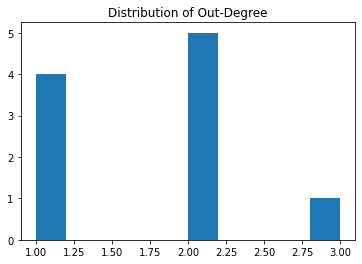

In [0]:
# part a - plot results from test file (RUN THIS CELL AS IS)
plt.hist(test_results[2], bins=10)
plt.title("Distribution of Out-Degree")
display(plt.show())

In [0]:
# part a - run your job on the full file (RUN THIS CELL AS IS)
start = time.time()
full_results = count_degree(wikiRDD,1000)

print(f"... completed job in {time.time() - start} seconds")
print("Average out-degree: ", full_results[1])
print("Top 10 nodes (by out-degree:)\n", full_results[0])

... completed job in 166.75639462471008 seconds
Average out-degree: 24.58172086160741
Top 10 nodes (by out-degree:)
 [('7883280', 7132), ('7884831', 5877), ('6075450', 5875), ('6074992', 5855), ('7828359', 5839), ('7880980', 5692), ('1008643', 5598), ('7828391', 5597), ('7873008', 5573), ('7841582', 5530)]

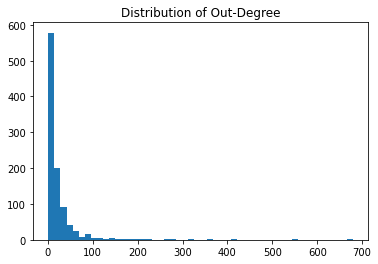

In [0]:
# part a - plot results from full file (RUN THIS CELL AS IS)
plt.hist(full_results[2], bins=50)
plt.title("Distribution of Out-Degree")
display(plt.show())

# Question 7 - PageRank part 1 (Initialize the Graph)

One of the challenges of performing distributed graph computation is that you must pass the entire graph structure through each iteration of your algorithm. As usual, we seek to design our computation so that as much work as possible can be done using the contents of a single record. In the case of PageRank, we'll need each record to include a node, its list of neighbors and its (current) rank. In this question you'll initialize the graph by creating a record for each dangling node and by setting the initial rank to 1/N for all nodes. 

__`NOTE:`__ Your solution should _not_ hard code \\(N\\).

### Q7 Tasks:
* __a) short response:__ What is \\(N\\)? Use the analogy of the infinite random web-surfer to explain why we'll initialize each node's rank to \\(\frac{1}{N}\\). (i.e. what is the probabilistic interpretation of this choice?)

* __b) short response:__ Will it be more efficient to compute \\(N\\) before initializing records for each dangling node or after? Explain your reasoning.

* __c) code:__ Fill in the missing code below to create a Spark job that:
  * parses each input record
  * creates a new record for any dangling nodes and sets it list of neighbors to be an empty set
  * initializes a rank of 1/N for each node
  * returns a pair RDD with records in the format specified by the docstring


* __d) code:__ Run the provided code to confirm that your job in `part a` has a record for each node and that your should records match the format specified in the docstring and the count should match what you computed in question 5. [__`TIP:`__ _you might want to take a moment to write out what the expected output should be fore the test graph, this will help you know your code works as expected_]
 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q7 Student Answers:

> __a)__ N is the total number of nodes in the graph. In this specific example it is, 15,192,277. To Initialize, an initial state vector x is assined with the value 1/n for each node, where n is the total number of nodes. We do to initialize uniform distribution of page rank values across all nodes since a random surfer can start at any page/node and there is a probablity of 1/n of the random surfer to start at any page in a web-graph of n pages

> __b)__ It will be more efficient to compute N before initializing records for each dangling node. To identify the dangling nodes, we have to collect all nodes in driver memory. We can calculate N that time itself instead of running a second pass on the final RDD. ( as done in code for next part)

In [0]:
# part c - job to initialize the graph (RUN THIS CELL AS IS)
def initGraph(dataRDD):
    """
    Spark job to read in the raw data and initialize an 
    adjacency list representation with a record for each
    node (including dangling nodes).
    
    Returns: 
        graphRDD -  a pair RDD of (node_id , (score, edges))
        
    NOTE: The score should be a float, but you may want to be 
    strategic about how format the edges... there are a few 
    options that can work. Make sure that whatever you choose
    is sufficient for Question 8 where you'll run PageRank.
    """
    ############## YOUR CODE HERE ###############

    # write any helper functions here
    #helper function to split records into tuple of node and edges
    def parse(line):
      node, edges = line.split('\t')
      return (node, ast.literal_eval(edges))
     
      #helper function to extract nodes from adjacency list
    def get_all_nodes(pair):
      for v in pair[1]:
        yield v
      yield pair[0]
     
    #helper function to get non dangling nodes
    def get_non_dangling_nodes(pair):
      return pair[0]
    # write your main Spark code here
    #parse records and cache RDD
    cachedRDD= dataRDD.map(parse).cache()
    
    #create list from cached RDD with all nodes
    allNodes=set(cachedRDD.flatMap(get_all_nodes).distinct().collect())
    
    #get count of nodes
    N=len(allNodes)
    #broadcast count 
    N_1=sc.broadcast(1/N)
    
    #list from RDD with non dangling nodes
    ND_Nodes= set(cachedRDD.map(get_non_dangling_nodes).distinct().collect())
    
    # list of dangling nodes
    dang_nodes= allNodes-ND_Nodes
    
    #transform list to RDD and add value as empty dictionary
    dang_RDD= sc.parallelize(dang_nodes).map(lambda x : (x,{}))
    #union dangling nodes RDD with parsed RDD
    revised_RDD= cachedRDD.union(dang_RDD)
    
    #get graphRDD with records as a pair RDD of (node_id , (score, edges))
    graphRDD= revised_RDD.mapValues(lambda x : (N_1.value,x))
    ############## (END) YOUR CODE ##############
    
    return graphRDD

In [0]:
# part c - run your Spark job on the test graph (RUN THIS CELL AS IS)
start = time.time()
testGraph = initGraph(testRDD).collect()
print(f'... test graph initialized in {time.time() - start} seconds.')
testGraph

... test graph initialized in 5.039959192276001 seconds.
Out[54]: [('2', (0.09090909090909091, {'3': 1})),
 ('3', (0.09090909090909091, {'2': 2})),
 ('4', (0.09090909090909091, {'1': 1, '2': 1})),
 ('5', (0.09090909090909091, {'4': 3, '2': 1, '6': 1})),
 ('6', (0.09090909090909091, {'2': 1, '5': 2})),
 ('7', (0.09090909090909091, {'2': 1, '5': 1})),
 ('8', (0.09090909090909091, {'2': 1, '5': 1})),
 ('9', (0.09090909090909091, {'2': 1, '5': 1})),
 ('10', (0.09090909090909091, {'5': 1})),
 ('11', (0.09090909090909091, {'5': 2})),
 ('1', (0.09090909090909091, {}))]

In [0]:
# part c - run your code on the main graph (RUN THIS CELL AS IS)
start = time.time()
wikiGraphRDD = initGraph(wikiRDD)
print(f'... full graph initialized in {time.time() - start} seconds')

... full graph initialized in 566.4026794433594 seconds

In [0]:
# part c - confirm record format and count (RUN THIS CELL AS IS)
start = time.time()
print(f'Total number of records: {wikiGraphRDD.count()}')
print(f'First record: {wikiGraphRDD.take(1)}')
print(f'... initialization continued: {time.time() - start} seconds')

Total number of records: 15192277
First record: [('73', (6.582291778908455e-08, {'14417532': 1}))]
... initialization continued: 22.77966618537903 seconds

# Question 8 - PageRank part 2 (Iterate until convergence)

Finally we're ready to compute the page rank. In this last question you'll write a Spark job that iterates over the initialized graph updating each nodes score until it reaches a convergence threshold. The diagram below gives a visual overview of the process using a 5 node toy graph. Pay particular attention to what happens to the dangling mass at each iteration.

<img src='https://github.com/kyleiwaniec/w261_assets/blob/master/images/HW5/PR-illustrated.png?raw=true' width=50%>



__`A Note about Notation:`__ The formula above describes how to compute the updated page rank for a node in the graph. The $P$ on the left hand side of the equation is the new score, and the $P$ on the right hand side of the equation represents the accumulated mass that was re-distributed from all of that node's in-links. Finally, $|G|$ is the number of nodes in the graph (which we've elsewhere refered to as $N$).

### Q8 Tasks:
* __a) short response:__ In terms of the infinite random walk analogy, interpret the meaning of the first term in the PageRank calculation: $\alpha * \frac{1}{|G|}$

* __b) short response:__ In the equation for the PageRank calculation above what does $m$ represent and why do we divide it by $|G|$?

* __c) short response:__ Keeping track of the total probability mass after each update is a good way to confirm that your algorithm is on track. How much should the total mass be after each iteration?

* __d) code:__ Fill in the missing code below to create a Spark job that take the initialized graph as its input then iterates over the graph and for each pass:
  * reads in each record and redistributes the node's current score to each of its neighbors
  * uses an accumulator to add up the dangling node mass and redistribute it among all the nodes. (_Don't forget to reset this accumulator after each iteration!_)
  * uses an accumulator to keep track of the total mass being redistributed.( _This is just for your own check, its not part of the PageRank calculation. Don't forget to reset this accumulator after each iteration._)
  * aggregates these partial scores for each node
  * applies telportation and damping factors as described in the formula above.
  * combine all of the above to compute the PageRank as described by the formula above.
  * 
  
   __WARNING:__ Some pages contain multiple hyperlinks to the same destination, please take this into account when redistributing the mass.

 
__`NOTE:`__ Please observe scalability best practices in the design of your code & comment your work clearly. You will be graded on both the clarity and the design.

### Q8 Student Answers:

> __a)__  Before a random surfer decides where to go next, there is a probablity of a random jump to a completely diferent page, which is not linked to the page the surfer is at currently.This probablity or factor alpha is also called teleportation factor. Since there is an 1/|G| chance of landing at any particular page, where |G| is the number of nodes in the web-graph, with probablity alpha, the random surfer executes a random jump to any of G pages, hence the entire probablity of random jump to a page is alpha * 1/|G|

> __b)__ m is the missing Pagerank mass lost at the dangling nodes. We need to divide it by |G| in order to redistributed the missing mass to each node in the graph after each iteration.

> __c)__ After each iteration, total mass should be 1 , so that the valid probabality distribution is intact.

In [0]:
# part d - provided FloatAccumulator class (RUN THIS CELL AS IS)

from pyspark.accumulators import AccumulatorParam

class FloatAccumulatorParam(AccumulatorParam):
    """
    Custom accumulator for use in page rank to keep track of various masses.
    
    IMPORTANT: accumulators should only be called inside actions to avoid duplication.
    We strongly recommend you use the 'foreach' action in your implementation below.
    """
    def zero(self, value):
        return value
    def addInPlace(self, val1, val2):
        return val1 + val2

In [0]:
# part d - job to run PageRank (RUN THIS CELL AS IS)
def runPageRank(graphInitRDD, alpha = 0.15, maxIter = 10, verbose = True):
    """
    Spark job to implement page rank
    Args: 
        graphInitRDD  - pair RDD of (node_id , (score, edges))
        alpha         - (float) teleportation factor
        maxIter       - (int) stopping criteria (number of iterations)
        verbose       - (bool) option to print logging info after each iteration
    Returns:
        steadyStateRDD - pair RDD of (node_id, pageRank)
    """
    # teleportation:
    a = sc.broadcast(alpha)
    
    # damping factor:
    d = sc.broadcast(1-a.value)
    
    # initialize accumulators for dangling mass & total mass
    mmAccum = sc.accumulator(0.0, FloatAccumulatorParam())
    totAccum = sc.accumulator(0.0, FloatAccumulatorParam())
    
    ############## YOUR CODE HERE ###############
    #calculate and broadcast N
    N=graphInitRDD.count()
    N_1=sc.broadcast(1/(N)) 
    
    # write your helper functions here
    #function to get all nodes and distributed initial mass
    # reads in each record and redistributes the node's current score to each of its neighbors
    def dist_mass(pair):
      (node_id ,(score, edges))=pair
      tot_o = 0
      for n in edges:
        tot_o+=edges[n]
      for v in edges:
        yield (v,(score*edges[v]/tot_o,dict()))
      yield (node_id ,(0, edges))
      
    #  Function to calculate new page rank
    # applies telportation and damping factors
    def new_page_rank(pair, mm):
      score, edges =pair
      #totAccum.add(float(score))
      score= a.value*N_1.value+ d.value*(mm*N_1.value+score)
      totAccum.add(float(score))
      return (score, edges)
    
    #function to merge 2 dictionaries
    def merge_dict(a,b):
      a.update(b)
      return a
    
    # set steadystateRdd as inpit grapg rdd
    steadyStateRDD=graphInitRDD
    for i in range(maxIter):
      #look for the dangling nodes in the RDD and use accumulator to add up the dangling node mass
      steadyStateRDD.filter(lambda x: len(x[1][1])==0).foreach(lambda x: mmAccum.add(float(x[1][0])))
      
      #broadcast dangling node mass
      mmAccum=sc.broadcast(mmAccum.value)
      
      #transform steadystateRDD
      # redistributes the node's current score to each of its neighbors
      # aggregates the partial scores for each node
      # calculate new page rank and cache
      steadyStateRDD=steadyStateRDD.flatMap(dist_mass)\
                      .reduceByKey(lambda a,b: (a[0]+b[0], merge_dict(a[1],b[1])))\
                      .mapValues(lambda x: new_page_rank(x,mmAccum.value)).cache()
      # count N
      steadyStateRDD.count()
      #if verbose:
        #print("totAccum:",totAccum.value)
        #print("mmaccum",mmAccum.value)
      # initialize accumulators for dangling mass & total mass
      mmAccum = sc.accumulator(0.0, FloatAccumulatorParam())
      totAccum = sc.accumulator(0.0, FloatAccumulatorParam())
      
    steadyStateRDD = steadyStateRDD.mapValues(lambda x: x[0]).cache()
    ############## (END) YOUR CODE ###############
    
    return steadyStateRDD

In [0]:
# part d - run PageRank on the test graph (RUN THIS CELL AS IS)
# NOTE: while developing your code you may want turn on the verbose option
nIter = 20
testGraphRDD = initGraph(testRDD)
start = time.time()
test_results = runPageRank(testGraphRDD, alpha = 0.15, maxIter = nIter, verbose = True)
print(f'...trained {nIter} iterations in {time.time() - start} seconds.')
print(f'Top 20 ranked nodes:')
test_results.takeOrdered(20, key=lambda x: - x[1])

...trained 20 iterations in 7.8617541790008545 seconds.
Top 20 ranked nodes:
Out[56]: [('2', 0.3620640495978871),
 ('3', 0.333992700474142),
 ('5', 0.08506399429624555),
 ('4', 0.06030963508473455),
 ('1', 0.04255740809817991),
 ('6', 0.03138662354831139),
 ('8', 0.01692511778009981),
 ('9', 0.01692511778009981),
 ('10', 0.01692511778009981),
 ('7', 0.01692511778009981),
 ('11', 0.01692511778009981)]

__`expected results for the test graph:`__
```
[(2, 0.3620640495978871),
 (3, 0.333992700474142),
 (5, 0.08506399429624555),
 (4, 0.06030963508473455),
 (1, 0.04255740809817991),
 (6, 0.03138662354831139),
 (8, 0.01692511778009981),
 (10, 0.01692511778009981),
 (7, 0.01692511778009981),
 (9, 0.01692511778009981),
 (11, 0.01692511778009981)]
```

In [0]:
# part d - run PageRank on the full graph (RUN THIS CELL AS IS)
# NOTE: wikiGraphRDD should have been computed & cached above!
nIter = 10
start = time.time()
full_results = runPageRank(wikiGraphRDD, alpha = 0.15, maxIter = nIter, verbose = True)
print(f'...trained {nIter} iterations in {time.time() - start} seconds.')
print(f'Top 20 ranked nodes:')
full_results.takeOrdered(20, key=lambda x: - x[1])

...trained 10 iterations in 4051.133935689926 seconds.
Top 20 ranked nodes:
Out[63]: [('13455888', 0.001544724712969233),
 ('4695850', 0.0006710240718847444),
 ('5051368', 0.0005983856809694915),
 ('1184351', 0.0005982073536424128),
 ('2437837', 0.00046249289288986535),
 ('6076759', 0.0004550940064105717),
 ('4196067', 0.00044237788883333634),
 ('13425865', 0.0004415535171391323),
 ('6172466', 0.00042240020018085596),
 ('1384888', 0.00040128956040455657),
 ('6113490', 0.0003957892477152726),
 ('14112583', 0.0003943847283716025),
 ('7902219', 0.0003700987847323983),
 ('10390714', 0.00036502649642944845),
 ('12836211', 0.0003619948863074984),
 ('6237129', 0.0003519555847593278),
 ('6416278', 0.00034866235644959653),
 ('13432150', 0.00033936510637094536),
 ('1516699', 0.0003329750028594388),
 ('7990491', 0.0003076090626557169)]

In [0]:
top_20 = full_results.takeOrdered(20, key=lambda x: - x[1])

In [0]:
# Save the top_20 results to disc for use later. So you don't have to rerun everything if you restart the cluster.
dbutils.fs.put(hw5_path+'page_rank_top_20.txt',str(top_20),True)

Wrote 732 bytes.
Out[65]: True

In [0]:
# view record from indexRDD (RUN THIS CELL AS IS)
# title\t indx\t inDeg\t outDeg
indexRDD.take(1)

In [0]:
# map indexRDD to new format (index, name) (RUN THIS CELL AS IS)
namesKV_RDD = indexRDD.map(lambda x: (int(x.split('\t')[1]), x.split('\t')[0]))

In [0]:
# see new format (RUN THIS CELL AS IS)
namesKV_RDD.take(2)

# OPTIONAL
### The rest of this notebook is optional and doesn't count toward your grade.
The indexRDD we created earlier from the indices.txt file contains the titles of the pages and thier IDs.

* __a) code:__ Join this dataset with your top 20 results.
* __b) code:__ Print the results

## Join with indexRDD and print pretty

In [0]:
# part a
joinedWithNames = None
############## YOUR CODE HERE ###############

############## END YOUR CODE ###############

In [0]:
# part b
# Feel free to modify this cell to suit your implementation, but please keep the formatting and sort order.
print("{:10s}\t| {:10s}\t| {}".format("PageRank","Page id","Title"))
print("="*100)
for r in joinedWithNames:
    print ("{:6f}\t| {:10d}\t| {}".format(r[1][1],r[0],r[1][0]))

## OPTIONAL - GraphFrames
GraphFrames is a graph library which is built on top of the Spark DataFrames API.

* __a) code:__ Using the same dataset, run the graphframes implementation of pagerank.
* __b) code:__ Join the top 20 results with indices.txt and display in the same format as above.
* __c) short answer:__ Compare your results with the results from graphframes.

__NOTE:__ Feel free to create as many code cells as you need. Code should be clear and concise - do not include your scratch work. Comment your code if it's not self annotating.

In [0]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from graphframes import *
from pyspark.sql import functions as F

In [0]:
# load the data into Spark RDDs for convenience of use later (RUN THIS CELL AS IS)
DATA_PATH = 'dbfs:/mnt/mids-w261/HW5/'
testRDD = sc.textFile(DATA_PATH +'test_graph.txt')
indexRDD = sc.textFile(DATA_PATH + '/indices.txt')
wikiRDD = sc.textFile(DATA_PATH + '/all-pages-indexed-out.txt')

### You will need to generate vertices (v) and edges (e) to feed into the graph below. 
Use as many cells as you need for this task.

In [0]:
# Create a GraphFrame
from graphframes import *
g = GraphFrame(v, e)


In [0]:
# Run PageRank algorithm, and show results.
results = g.pageRank(resetProbability=0.15, maxIter=10)

In [0]:
start = time.time()
top_20 = results.vertices.orderBy(F.desc("pagerank")).limit(20)
print(f'... completed job in {time.time() - start} seconds.')

In [0]:
%%time
top_20.show()

### Run the cells below to join the results of the graphframes pagerank algorithm with the names of the nodes.

In [0]:
namesKV_RDD = indexRDD.map(lambda x: (int(x.split('\t')[1]), x.split('\t')[0]))

In [0]:
namesKV_DF = namesKV_RDD.toDF()

In [0]:
namesKV_DF = namesKV_DF.withColumnRenamed('_1','id')
namesKV_DF = namesKV_DF.withColumnRenamed('_2','title')
namesKV_DF.take(1)

In [0]:
resultsWithNames = namesKV_DF.join(top_20, namesKV_DF.id==top_20.id).orderBy(F.desc("pagerank")).collect()

In [0]:
# TODO: use f' for string formatting
print("{:10s}\t| {:10s}\t| {}".format("PageRank","Page id","Title"))
print("="*100)
for r in resultsWithNames:
    print ("{:6f}\t| {:10s}\t| {}".format(r[3],r[2],r[1]))

### Congratulations, you have completed HW5! Please refer to the readme for submission instructions.

If you would like to provide feedback regarding this homework, please use the survey at: https://docs.google.com/forms/d/e/1FAIpQLSce9feiQeSkdP43A0ZYui1tMGIBfLfzb0rmgToQeZD9bXXX8Q/viewform